<a href="https://colab.research.google.com/github/alexmichelon/growdev-matematica-e-estatistica/blob/main/trabalho-final/Avaliacao_Final_Growdev_MatEst_Alex_Michelon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn em Instituição Financeira (fictícia)

## O que é churn?

Churn é o comportamento atribuído a um cliente ou funcionário que decide deixar uma empresa. Sabe-se que encontrar e conquistar um novo cliente é mais difícil e caro do que manter os clientes atuais [[Fonte](https://jrs.digital/conquistar-um-novo-cliente-custa-entre-5-a-7-vezes-mais-que-manter-um-atual/#:~:text=Segundo%20o%20economista%20americano%20Philip,de%20clientes%2C%20usu%C3%A1rios%20e%20compradores.)], portanto a análise de churn pode auxiliar nas políticas de uma empresa usadas para atuar nos clientes mais propensos a deixar a empresa e intervir antes de perdê-lo.


Neste projeto usaremos os dados fornecidos para tentar determinar padrões nos dados que indiquem o comportamento dos clientes que estejam associados aos clientes que deixaram o banco.

## Dataset

Esse dataset pode ser usado para a identificação de clientes que deixarão ou não a empresa, ou seja, um problema de classificação binária.

O dataset possui 10 000 registros e 13 colunas:

* **RowNumber**: Coluna indicando o número da linha na tabela de dados.

* **CustomerId**: Número identificador de cada cliente.

* **Surname**: Sobrenome do cliente.

* **CreditScore**: Score de crédito do cliente.

* **Geography**: Indicação de país.

* **Gender**: Sexo do cliente.

* **Age**: Idade do Cliente.

* **Tenure**: Coluna indicando há quanto tempo o cliente está com o banco.

* **Balance**: Coluna indicando o saldo ou o valor associado à conta do cliente.

* **NumOfProducts**: Coluna indicando o número de produtos do banco que o cliente usa.

* **HasCrCard**: Coluna indicando se o cliente possui cartão de crédito (0 ou 1).

* **IsActiveMember**: Coluna indicando se o cliente é ou não ativo (0 ou 1).

* **EstimatedSalary**: Salário estimado do cliente.

* **Exited**: Coluna indicando se o cliente abandonou (1) ou não (0) o banco.

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Atividade 1: Importe o conjunto de dados e exiba as cinco primeiras linhas.

In [ ]:
df = pd.read_csv('Abandono_clientes.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Atividade 2: Qual é o sobrenome mais comum?

In [ ]:
max_count_surname = df['Surname'].value_counts().idxmax()
max_count_surname

'Smith'

## Atividade 3: Supondo que temos uma função que consegue dizer quais clientes deixarão (`Exited=1`) o banco com base apenas no país (`Geography`) e no sexo (`Gender`) do cliente. Qual seria o domnínio e a imagem dessa função?

Em problemas de classificação deseja-se obter uma função (modelo preditivo que poderia envolver aprendizado de máquina) que consiga indicar quais clientes deixariam o banco, com base nos dados do cliente.

Resposta:
- domínio: o conjunto que representa os dados das classes "Geography" e "Gender".

- imagem: representado pelo conjunto das possibilidades de valores possíveis para a classe "Exited" (0, 1) aplicados para cada cliente do banco, considerando seu valor para as classes "Geography" e "Gender".

 * Im = f(x) -> {0, 1}


## Atividade 4: Se escolhermos um cliente ao acaso, qual é a probabilidade de que ele seja da França?



In [ ]:
#total de clientes
total_costumers = df['Geography'].count()
#total de clientes franceses
total_french_costumers = df['Geography'][df['Geography'] == 'France'].count()
#probabilidade de um cliente ser francês
probability_french_costumer = total_french_costumers / total_costumers

In [ ]:
print(f'A probabilidade de escolher um cliente ao acaso e este ser Francês é de'
      f' {total_french_costumers}/{total_costumers}: {probability_french_costumer*100:.2f}%')

A probabilidade de escolher um cliente ao acaso e este ser Francês é de 5014/10000: 50.14%


## Atividade 5: Escolhe-se um cliente ao acaso. Qual é a probabilidade de ele ser da França, sabendo que escolheu-se uma mulher?

In [ ]:
#total de clientes mulheres
total_women_costumers = df['Gender'][df['Gender'] == 'Female'].count()
#total de clientes mulheres que são francesas
total_french_women_costumers = df['Gender'][(df['Gender'] == 'Female') & (df['Geography'] == 'France')].count()
#probabilidade de ser francesa dentre as mulheres
probability_french_women_costumers = total_french_women_costumers / total_women_costumers


In [ ]:
print(f'A probabilidade de escolher um cliente ao acaso e este ser mulher e ser francesa é de '
      f'{total_french_women_costumers} / {total_women_costumers}: {probability_french_women_costumers*100:.2f}%.')

A probabilidade de escolher um cliente ao acaso e este ser mulher e ser francesa é de 2261 / 4543: 49.77%.


## Atividade 6: Qual é a probabilidade de escolhermos um cliente ao acaso e ser um homem, da França com menos de 25 anos?

In [ ]:
#total de clientes
total_costumers
#total de clientes homens que são franceses com idade inferior a 25 anos
total_french_men_costumer_under_25 = df['Gender'][(df['Gender'] == 'Male') & (df['Geography'] == 'France') & (df['Age'] < 25)].count()
#probabilidade de ser um cliente homem, francês e com idade inferior a 25 anos
probability_french_men_costumer_under_25 = total_french_men_costumer_under_25 / total_costumers

In [ ]:
print(f'A probabilidade de escolher um cliente ao acaso e este ser homem, francês e com idade inferior a 25 anos é de '
      f'{total_french_men_costumer_under_25} / {total_costumers}: {probability_french_men_costumer_under_25*100:.2f}%.')

A probabilidade de escolher um cliente ao acaso e este ser homem, francês e com idade inferior a 25 anos é de 130 / 10000: 1.30%.


## Atividade 7: Obtenha as estatísticas descritivas da variável `CreditScore`.
Isto é, obtenha a média, o desvio padrão e os quartis.

In [ ]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

## Atividade 8: Faça um boxplot da variável `CreditScore`.

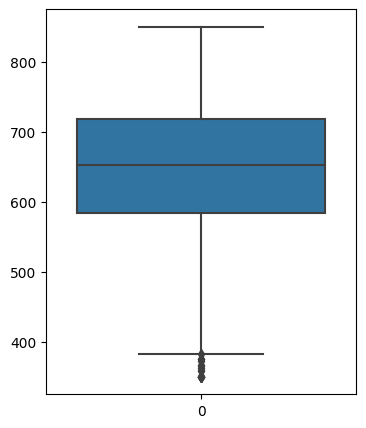

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df['CreditScore'])
plt.show()

## Atividade 9: Calcule as estatísticas descritivas para a variável `CreditScore` para cada classe da variável `Gender` e comente se o comportamento da variável `CreditScore` pode ser considerado diferente para os sexos masculino e feminino.

In [ ]:
#CreditScore para homens
df['CreditScore'][df['Gender'] == 'Male'].describe()

count    5457.000000
mean      650.276892
std        96.549706
min       350.000000
25%       583.000000
50%       651.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

In [ ]:
#CreditScore para mulheres
df['CreditScore'][df['Gender'] == 'Female'].describe()

count    4543.000000
mean      650.831389
std        96.787350
min       350.000000
25%       584.000000
50%       652.000000
75%       717.000000
max       850.000000
Name: CreditScore, dtype: float64

Com base nas informações descritivas da variável "CreditScore" para homens e mulheres, podemos dizer de que os valores são muito parecidos dentro os diferentes gêneros para este conjunto de dados. É possível dizer de que a classe "CreditScore", neste caso, não sofre dependência significante da classe "Gender".

## Atividade 10: Faça um boxplot da variável `CreditScore` para cada classe da variável `Gender` e comente se o comportamento da variável `CreditScore` pode ser considerado diferente para os sexos masculino e feminino.

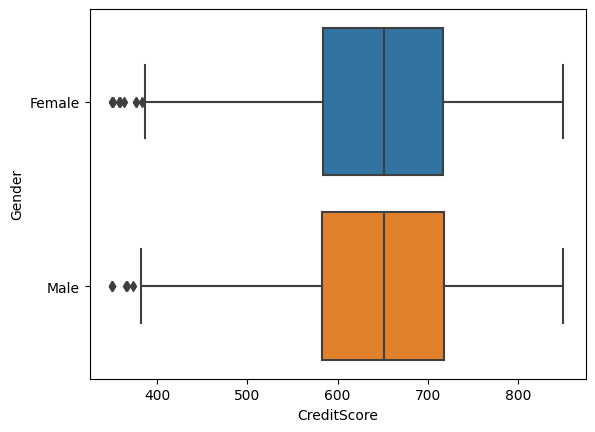

In [ ]:
boxplot = sns.boxplot(data=df, x='CreditScore', y='Gender');

Com base nas informações descritivas da variável "CreditScore" para homens e mulheres, podemos dizer de que os valores são muito parecidos dentro os diferentes gêneros para este conjunto de dados. É possível dizer de que a classe "CreditScore", neste caso, não sofre dependência significante da classe "Gender".

## Atividade 11: Qual é o percentual de homens (em relação ao total de homens) e de mulheres (em relação ao total de mulheres) que deixaram o banco? Existe algum grupo que tem mais propensão a deixar a instituição? Se houver, como poderíamos tentar resolver o problema?

In [ ]:
#total de clientes homens
total_men_costumers = df['Gender'][df['Gender'] == 'Male'].count()
#total de clientes homens que deixaram o banco
total_men_costumers_left = df['Gender'][(df['Gender'] == 'Male') & (df['Exited'] == 1)].count()
percent_total_men_costumers_left = total_men_costumers_left / total_men_costumers
print(f'Total homens: {total_men_costumers}\n'
      f'Número de homens que deixaram o banco: {total_men_costumers_left}\n'
      f'Percentual de homens que deixaram o banco: {percent_total_men_costumers_left*100:.2f}%.')

Total homens: 5457
Número de homens que deixaram o banco: 898
Percentual de homens que deixaram o banco: 16.46%.


In [ ]:
#total de clientes mulheres
total_women_costumers = df['Gender'][df['Gender'] == 'Female'].count()
#total de clientes mulheres que deixaram o banco
total_women_costumers_left = df['Gender'][(df['Gender'] == 'Female') & (df['Exited'] == 1)].count()
percent_total_women_costumers_left = total_women_costumers_left / total_women_costumers
print(f'Total mulheres: {total_women_costumers}\n'
      f'Número de mulheres que deixaram o banco: {total_women_costumers_left}\n'
      f'Percentual de mulheres que deixaram o banco: {percent_total_women_costumers_left*100:.2f}%.')

Total mulheres: 4543
Número de mulheres que deixaram o banco: 1139
Percentual de mulheres que deixaram o banco: 25.07%.


In [ ]:
#1139 mulheres deixaram o banco
women_exited = df[(df['Gender'] == 'Female') & (df['Exited'] == 1)]
#762 destas mulheres possuiam apenas 1 produto do banco
women_exited['NumOfProducts'].value_counts()
#das mulheres que sairam que tinham um produto, 536 tinham cartão de crédito
women_exited['HasCrCard'][women_exited['NumOfProducts'] == 1].value_counts()
#das mulheres que sairam que tinham um ou dois  produto, 623 não eram membros ativos
women_exited['Balance'][(women_exited.NumOfProducts.isin([1])) & (women_exited.HasCrCard == 1)].value_counts()
#25% das mulheres que saíram do banco não tinham dinheiro no banco
women_exited['Balance'].describe()


count      1139.000000
mean      89036.639359
std       58664.516273
min           0.000000
25%           0.000000
50%      108076.330000
75%      130842.870000
max      238387.560000
Name: Balance, dtype: float64

Com base nesta extração de informações, a tendência de clientes do gênero mulher saírem  do banco é maior do que entre os clientes do gênero homem.

Dentre as clientes do gênero mulher que deixaram de ser clientes do banco (1139), cerca de 25% do total para este gênero (4543); 67% (762) destas clientes possuíam apenas um produto do banco sendo este produto o cartão de crédito (536 mulheres, 70%).

Diante disto, talvez uma abordagem para evitar que este tipo de cliente (mulheres que utilizam apenas o cartão de crédito) seria promover campanhas para demonstração de outros produtos do banco de forma a atrair o interesse deste grupo. Além disso, poderia também ser analisadas formas para reduzir encargos sobre a utilização de cartão de crédito tais como anuidade e taxas pois estas saídas podem estar ligadas a insatisfação com este produto.

## Atividade 12: Obtenha os valores mínimo e máximo da variável `EstimatedSalary` e encontre uma função do primeiro grau que passe pelos pontos (0,mínimo) e (9999, máximo). Após isso faça o gráfico dessa função e compare com o gráfico variável `EstimatedSalary`.

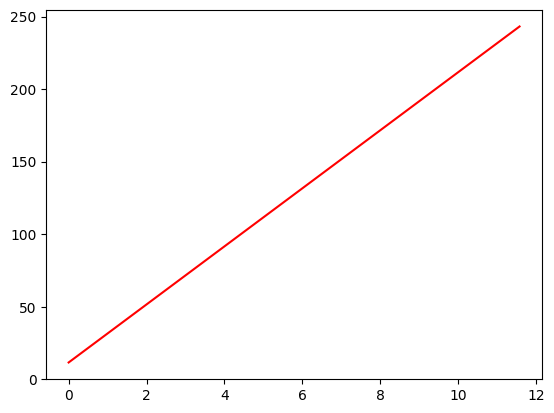

In [ ]:
minimo = df['EstimatedSalary'].min()
maximo = df['EstimatedSalary'].max()

x = np.linspace(9999, maximo, 10000)
x = np.linspace(0, minimo, 10)

def f(x):
   return (20 * x) + 11.58

y = f(x)

plt.plot(x,y, color='red');

No bloco de código abaixo, apenas altere a variável `y` e execute o código para ver se a função que criou se ajusta bem aos dados.

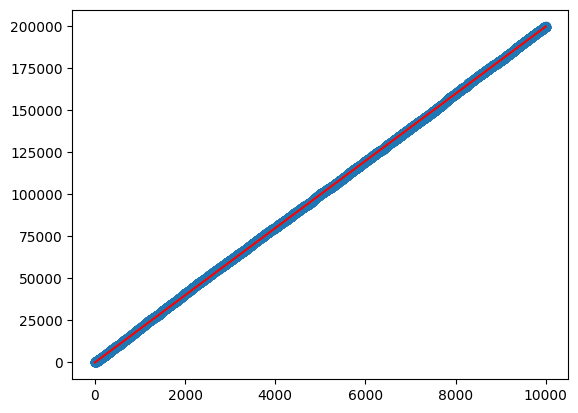

In [ ]:
x = np.linspace(0, 9999, 10000)
y = (20 * x) + 11.58
plt.scatter(x=x, y=df['EstimatedSalary'].sort_values())
plt.plot(x,y, color='red');